Samantha Mui

I conducted an Exploratory Data Analysis (EDA) of energy consumption and generation data from 241 countries and regions/regional alliances around the world. In my EDA, I hope to target environmental policy makers who can use our high-level analyses to inform their policies for scaling back on non-renewable energy sources, and examine current progress toward switching to renewable energy sources, based on trends within individual countries. I also would also like to target global environmental organisations like the UN Environment Programme, who may appreciate cross-regional and country analyses on energy consumption and generation.

https://www.kaggle.com/datasets/pranjalverma08/energy-dataset-countrywise-19002021?resource=download

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import zipfile

In [ ]:
pip install kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pranjalverma08/energy-dataset-countrywise-19002021")

print("Path to dataset files:", path)

100%|██████████| 2.02M/2.02M [00:00<00:00, 83.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/pranjalverma08/energy-dataset-countrywise-19002021/versions/1


In [ ]:
import requests
import json
from pprint import pprint

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')


In [ ]:
! kaggle datasets download pranjalverma08/energy-dataset-countrywise-19002021

Dataset URL: https://www.kaggle.com/datasets/pranjalverma08/energy-dataset-countrywise-19002021
License(s): CC0-1.0
  0% 0.00/2.02M [00:00<?, ?B/s]
100% 2.02M/2.02M [00:00<00:00, 147MB/s]


In [ ]:
! unzip "energy-dataset-countrywise-19002021.zip"

Archive:  energy-dataset-countrywise-19002021.zip
  inflating: Afghanistan_energy_data.csv  
  inflating: Africa_energy_data.csv  
  inflating: Albania_energy_data.csv  
  inflating: Algeria_energy_data.csv  
  inflating: American Samoa_energy_data.csv  
  inflating: Angola_energy_data.csv  
  inflating: Antarctica_energy_data.csv  
  inflating: Antigua and Barbuda_energy_data.csv  
  inflating: Argentina_energy_data.csv  
  inflating: Armenia_energy_data.csv  
  inflating: Aruba_energy_data.csv   
  inflating: Asia Pacific_energy_data.csv  
  inflating: Australia_energy_data.csv  
  inflating: Austria_energy_data.csv  
  inflating: Azerbaijan_energy_data.csv  
  inflating: Bahamas_energy_data.csv  
  inflating: Bahrain_energy_data.csv  
  inflating: Bangladesh_energy_data.csv  
  inflating: Barbados_energy_data.csv  
  inflating: Belarus_energy_data.csv  
  inflating: Belgium_energy_data.csv  
  inflating: Belize_energy_data.csv  
  inflating: Benin_energy_data.csv   
  inflating: Ber

In [ ]:
zip_path = "energy-dataset-countrywise-19002021.zip"

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as z:
    csv_files = [f for f in z.namelist() if f.endswith('.csv')]
    world_energy_df = pd.concat([pd.read_csv(z.open(f)) for f in csv_files], ignore_index=True)

In [ ]:
world_energy_df.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,17239.000000,7152.000000,13589.000000,5.074000e+03,9491.000000,6474.000000,10106.000000,9983.000000,10135.000000,4936.000000,...,4835.000000,7112.000000,4367.000000,6067.000000,1820.000000,4835.000000,4743.000000,4835.000000,7112.000000,4367.000000
mean,1973.609722,23.968662,9.621462,1.841334e+14,14.152412,20.067887,15.282424,4.224858,42.962626,2.094248,...,7.969383,13.952362,36.392106,1.223524,209.910982,0.371352,3.257272,23.392614,53.206260,149.732919
std,34.727666,725.148859,149.031801,1.311620e+16,92.682368,354.470689,176.113214,26.573195,316.803222,5.604580,...,72.336142,60.524479,150.525206,4.396865,5707.382457,1.421771,21.193715,165.083532,239.279519,559.841069
min,1900.000000,-100.000000,-2366.470000,-1.000000e+02,-1225.490000,-100.000000,-3638.516000,-95.005000,-6910.324000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,-10.409000,0.000000,0.000000,0.000000
25%,1946.000000,-5.226250,0.000000,-1.382250e+00,0.000000,-3.816750,0.000000,-0.670000,-0.065000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.481000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1983.000000,2.030000,0.000000,3.718500e+00,0.000000,1.300000,0.000000,2.341000,0.445000,0.019000,...,0.000000,0.000000,0.000000,0.000000,19.732000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2002.000000,9.994500,0.163000,1.152850e+01,1.333000,10.692750,1.384000,6.713000,8.435000,1.595500,...,0.017000,0.000000,0.432000,0.108500,50.064000,0.022000,0.019000,0.191500,0.555000,5.816500
max,2021.000000,44965.754000,3057.952000,9.342930e+17,2093.606000,25500.000000,2795.152000,1458.505000,6502.243000,72.881000,...,2111.177000,1129.198000,2306.786000,56.840000,242329.182000,24.601000,430.975000,3925.718000,3588.088000,6965.521000


In [ ]:
world_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17239 entries, 0 to 17238
Columns: 128 entries, iso_code to wind_energy_per_capita
dtypes: float64(125), int64(1), object(2)
memory usage: 16.8+ MB


In [ ]:
world_energy_df.isna().head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
# Remove regions so that our analysis is centred on countries rather than regions/regional alliances

check_coun = ['Asia Pacific', 'CIS', 'European Union \(27\)', 'Non-OECD', 'OECD', 'Western Africa', 'World', 'Europe', 'Middle East']
no_regions = world_energy_df[~world_energy_df['country'].str.contains('|'.join(check_coun), na=False)]

# renewables sorted from top to bottom
renewables_sorted_df = no_regions.groupby('country')['renewables_electricity'].mean().sort_values(ascending=False)
renewables_sorted_df

,renewables_electricity
country,
China,406.723125
United States,388.836123
Canada,307.662684
Brazil,247.939579
Russia,171.209027
...,...
U.S. Territories,NaN
Wake Island,NaN
West Germany,NaN


In [ ]:
# dropping countries that utilise no renewable energies
renewables_sorted_df.dropna(inplace=True)
renew_drop_zero = renewables_sorted_df[renewables_sorted_df != 0]
renew_drop_zero.tail(50)

,renewables_electricity
country,
Rwanda,0.192857
United Arab Emirates,0.188036
Haiti,0.184286
Mongolia,0.179091
Mauritania,0.171905
Equatorial Guinea,0.167143
Singapore,0.144211
Kosovo,0.142857
Burundi,0.141818


Text(0.5, 1.0, 'Top 20 Countries Sorted By Average Mean Renewable Electricity Generation')

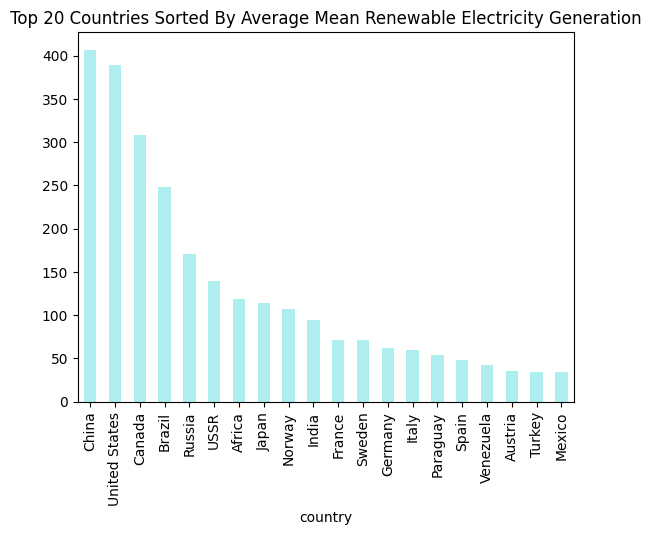

In [ ]:
renew_top = renew_drop_zero.head(20)
renew_top.plot(kind='bar', color='paleturquoise')
plt.title("Top 20 Countries Sorted By Average Mean Renewable Electricity Generation")

Text(0, 0.5, 'Share of Energy in %')

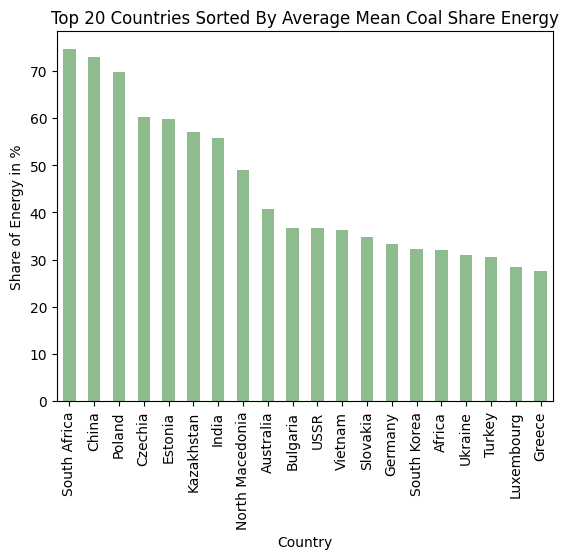

In [ ]:
# do the same for countries using share of energy use that comes from coal
coal_share_sorted = no_regions.groupby('country')['coal_share_energy'].mean().sort_values(ascending=False)
coal_share_sorted.dropna(inplace=True)
coal_share_top = coal_share_sorted.head(20)
coal_share_top.plot(kind='bar', color='darkseagreen')
plt.title("Top 20 Countries Sorted By Average Mean Coal Share Energy")
plt.xlabel("Country")
plt.ylabel("Share of Energy in %")

Text(0.5, 1.0, 'Top 20 Countries Sorted By Average Mean Fossil Share Energy')

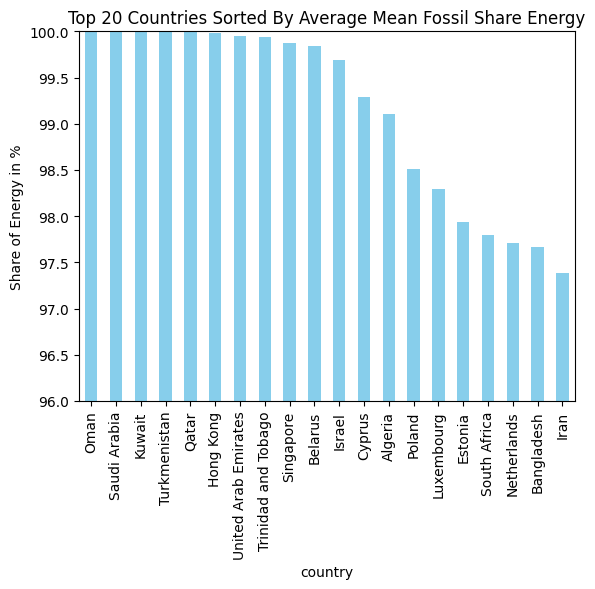

In [ ]:
# do the same for countries using fossil_share_energy
fossil_share_sorted = no_regions.groupby('country')['fossil_share_energy'].mean().sort_values(ascending=False)
fossil_drop_zero = fossil_share_sorted.dropna(inplace=True)
fossil_share_top = fossil_share_sorted.head(20)
fossil_share_top.plot(kind='bar', color = 'skyblue')
plt.ylim(96, 100)
plt.ylabel("Share of Energy in %" )
plt.title("Top 20 Countries Sorted By Average Mean Fossil Share Energy")


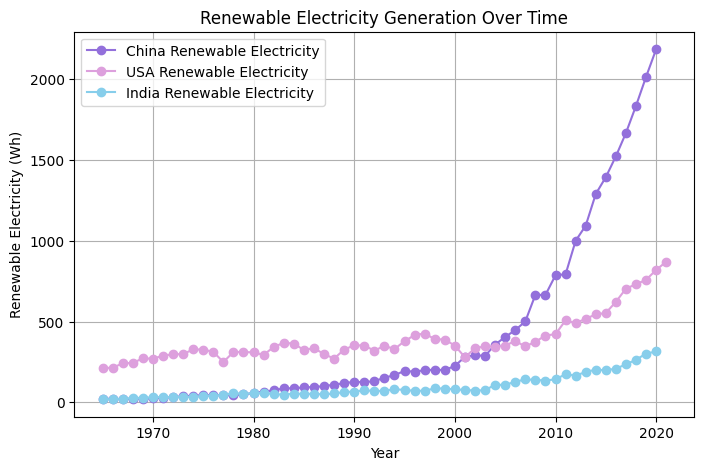

In [ ]:
# do time series of renewables generation for china
china_renew = no_regions[no_regions['country'] == 'China']
china_renew_ts = china_renew.set_index('year')['renewables_electricity']
usa_renew_ts = no_regions[no_regions['country'] == 'United States'].set_index('year')['renewables_electricity']
india_renew_ts = no_regions[no_regions['country'] == 'India'].set_index('year')['renewables_electricity']

# plot time series
plt.figure(figsize=(8, 5))
plt.plot(china_renew_ts, marker='o', linestyle='-', color='mediumpurple', label='China Renewable Electricity')
plt.plot(usa_renew_ts, marker='o', linestyle='-', color='plum', label='USA Renewable Electricity')
plt.plot(india_renew_ts, marker='o', linestyle='-', color='skyblue', label='India Renewable Electricity')

# plot formatting
plt.xlabel('Year')
plt.ylabel('Renewable Electricity (Wh)')
plt.title('Renewable Electricity Generation Over Time')
plt.legend()
plt.grid(True)

In [ ]:
gh_gas = no_regions.groupby('country')['greenhouse_gas_emissions'].mean().sort_values(ascending=False)
gh_gas

,greenhouse_gas_emissions
country,
China,2739.467727
United States,1917.024091
India,678.945455
Japan,477.317727
Russia,370.989545
...,...
USSR,NaN
Wake Island,NaN
West Germany,NaN


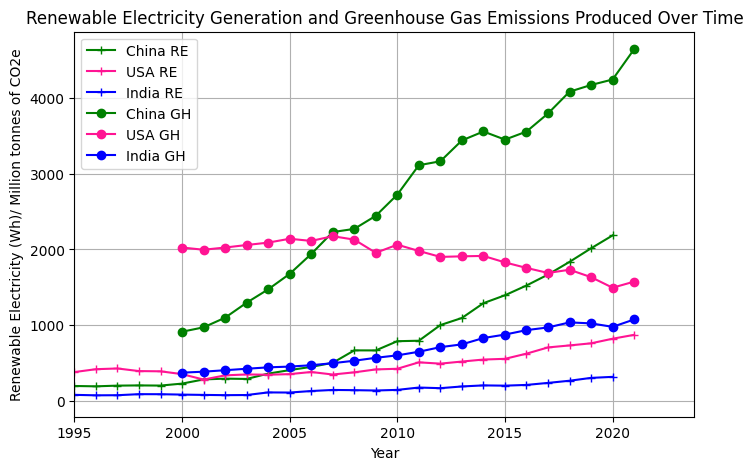

In [ ]:
# china, usa, india
china_gh_ts = no_regions[no_regions['country'] == 'China'].set_index('year')['greenhouse_gas_emissions']
usa_gh_ts = no_regions[no_regions['country'] == 'United States'].set_index('year')['greenhouse_gas_emissions']
india_gh_ts = no_regions[no_regions['country'] == 'India'].set_index('year')['greenhouse_gas_emissions']

plt.figure(figsize=(8, 5))
plt.plot(china_renew_ts, marker='+', linestyle='-', color='green', label='China RE')
plt.plot(usa_renew_ts, marker='+', linestyle='-', color='deeppink', label='USA RE')
plt.plot(india_renew_ts, marker='+', linestyle='-', color='blue', label='India RE')

plt.plot(china_gh_ts, marker='o', linestyle='-', color='green', label='China GH')
plt.plot(usa_gh_ts, marker='o', linestyle='-', color='deeppink', label='USA GH')
plt.plot(india_gh_ts, marker='o', linestyle='-', color='blue', label='India GH')

plt.xlim(1995)

# plot formatting
plt.xlabel('Year')
plt.ylabel('Renewable Electricity (Wh)/ Million tonnes of CO2e')
plt.title('Renewable Electricity Generation and Greenhouse Gas Emissions Produced Over Time')
plt.legend()
plt.grid(True)

# grpah suggests USA is shifting to cleaner ways of producing electricity, China and India are getting worse

<Axes: title={'center': 'Global Energy Source Distribution'}>

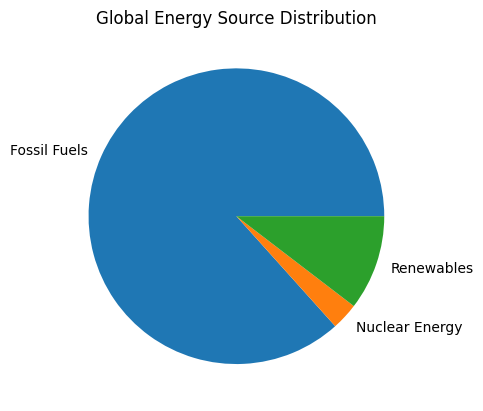

In [ ]:
#energy source distribution around the world
energy_mix = no_regions[['fossil_share_energy', 'nuclear_share_energy', 'renewables_share_energy']].mean()
custom_labels = ['Fossil Fuels', 'Nuclear Energy', 'Renewables']
energy_mix.plot(kind='pie', labels=custom_labels, title="Global Energy Source Distribution")


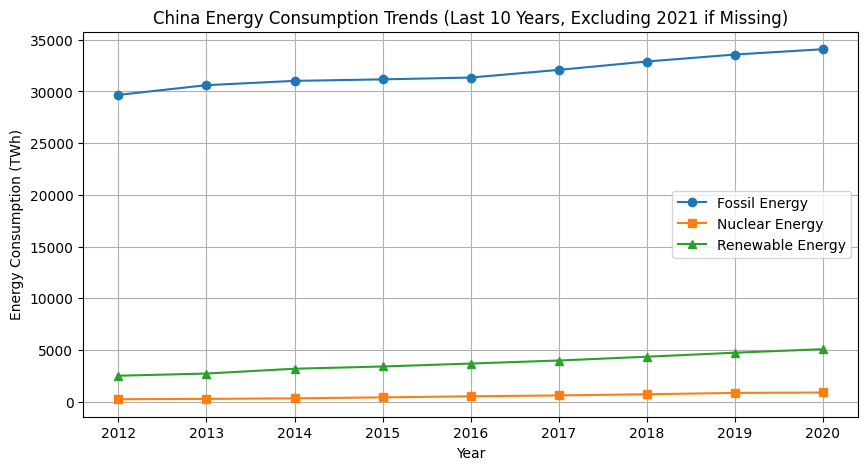

In [ ]:
#Energy Consumption for fossil, nuclear, and renewable energy across the countries with top 3 greenhouse gas emissions
country_name = "China"

country_energy_df = world_energy_df[world_energy_df["country"] == country_name]

latest_years = country_energy_df["year"].dropna().astype(int).unique()
latest_years.sort()

if 2021 not in latest_years:
    recent_10_years = latest_years[-10:]
else:
    recent_10_years = [year for year in latest_years[-10:] if year != 2021]  # Exclude 2021 if missing, most seem to be missing this data


energy_columns = {
    "fossil": ["coal_consumption", "oil_consumption", "gas_consumption"],
    "nuclear": ["nuclear_consumption"],
    "renewable": ["solar_consumption", "wind_consumption", "hydro_consumption", "biofuel_consumption"]}

filtered_data_country = country_energy_df[country_energy_df["year"].isin(recent_10_years)][["year"] +
                                                                                           sum(energy_columns.values(), [])]

filtered_data_country["fossil_energy"] = filtered_data_country[energy_columns["fossil"]].sum(axis=1, skipna=True)
filtered_data_country["nuclear_energy"] = filtered_data_country[energy_columns["nuclear"]].sum(axis=1, skipna=True)
filtered_data_country["renewable_energy"] = filtered_data_country[energy_columns["renewable"]].sum(axis=1, skipna=True)

final_data_country = filtered_data_country[["year", "fossil_energy", "nuclear_energy", "renewable_energy"]].dropna()

plt.figure(figsize=(10, 5))
plt.plot(final_data_country["year"], final_data_country["fossil_energy"], label="Fossil Energy", marker='o', linestyle='-')
plt.plot(final_data_country["year"], final_data_country["nuclear_energy"], label="Nuclear Energy", marker='s', linestyle='-')
plt.plot(final_data_country["year"], final_data_country["renewable_energy"], label="Renewable Energy", marker='^', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Energy Consumption (TWh)")
plt.title(f"{country_name} Energy Consumption Trends (Last 10 Years, Excluding 2021 if Missing)")
plt.legend()
plt.grid(True)

plt.show()


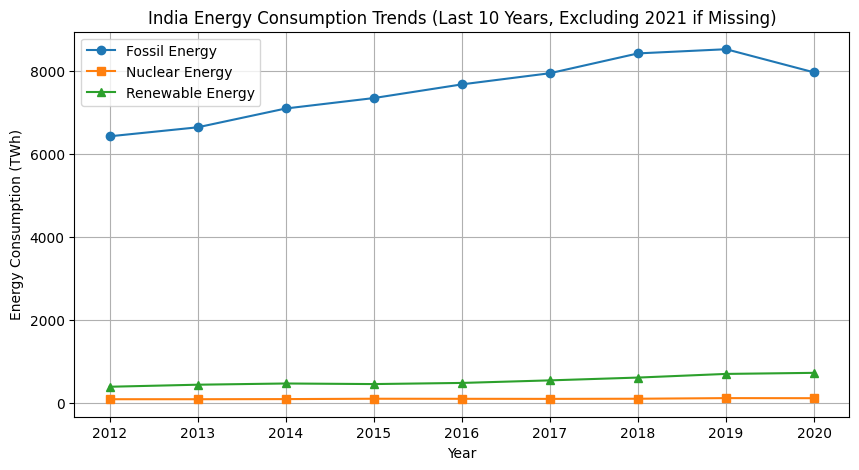

In [ ]:
country_name = "India"

country_energy_df = world_energy_df[world_energy_df["country"] == country_name]

latest_years = country_energy_df["year"].dropna().astype(int).unique()
latest_years.sort()

if 2021 not in latest_years:
    recent_10_years = latest_years[-10:]
else:
    recent_10_years = [year for year in latest_years[-10:] if year != 2021]

energy_columns = {
    "fossil": ["coal_consumption", "oil_consumption", "gas_consumption"],
    "nuclear": ["nuclear_consumption"],
    "renewable": ["solar_consumption", "wind_consumption", "hydro_consumption", "biofuel_consumption"]}

filtered_data_country = country_energy_df[country_energy_df["year"].isin(recent_10_years)][["year"] + sum(energy_columns.values(), [])]
filtered_data_country["fossil_energy"] = filtered_data_country[energy_columns["fossil"]].sum(axis=1, skipna=True)
filtered_data_country["nuclear_energy"] = filtered_data_country[energy_columns["nuclear"]].sum(axis=1, skipna=True)
filtered_data_country["renewable_energy"] = filtered_data_country[energy_columns["renewable"]].sum(axis=1, skipna=True)

final_data_country = filtered_data_country[["year", "fossil_energy", "nuclear_energy", "renewable_energy"]].dropna()

plt.figure(figsize=(10, 5))
plt.plot(final_data_country["year"], final_data_country["fossil_energy"], label="Fossil Energy", marker='o', linestyle='-')
plt.plot(final_data_country["year"], final_data_country["nuclear_energy"], label="Nuclear Energy", marker='s', linestyle='-')
plt.plot(final_data_country["year"], final_data_country["renewable_energy"], label="Renewable Energy", marker='^', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Energy Consumption (TWh)")
plt.title(f"{country_name} Energy Consumption Trends (Last 10 Years, Excluding 2021 if Missing)")
plt.legend()
plt.grid(True)

plt.show()

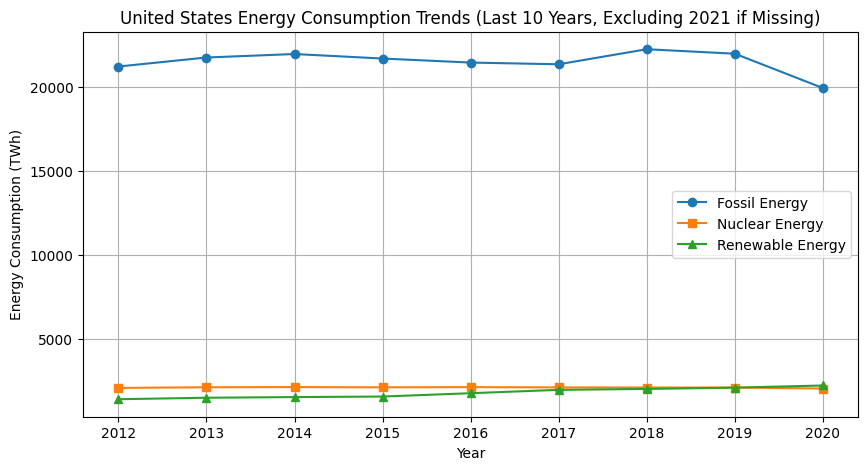

In [ ]:
country_name = 'United States'

country_energy_df = world_energy_df[world_energy_df["country"] == country_name]

latest_years = country_energy_df["year"].dropna().astype(int).unique()
latest_years.sort()

if 2021 not in latest_years:
    recent_10_years = latest_years[-10:]
else:
    recent_10_years = [year for year in latest_years[-10:] if year != 2021]

energy_columns = {
    "fossil": ["coal_consumption", "oil_consumption", "gas_consumption"],
    "nuclear": ["nuclear_consumption"],
    "renewable": ["solar_consumption", "wind_consumption", "hydro_consumption", "biofuel_consumption"]
}

filtered_data_country = country_energy_df[country_energy_df["year"].isin(recent_10_years)][["year"] +
                                                                                           sum(energy_columns.values(), [])]
filtered_data_country["fossil_energy"] = filtered_data_country[energy_columns["fossil"]].sum(axis=1, skipna=True)
filtered_data_country["nuclear_energy"] = filtered_data_country[energy_columns["nuclear"]].sum(axis=1, skipna=True)
filtered_data_country["renewable_energy"] = filtered_data_country[energy_columns["renewable"]].sum(axis=1, skipna=True)

final_data_country = filtered_data_country[["year", "fossil_energy", "nuclear_energy", "renewable_energy"]].dropna()

plt.figure(figsize=(10, 5))
plt.plot(final_data_country["year"], final_data_country["fossil_energy"], label="Fossil Energy", marker='o', linestyle='-')
plt.plot(final_data_country["year"], final_data_country["nuclear_energy"], label="Nuclear Energy", marker='s', linestyle='-')
plt.plot(final_data_country["year"], final_data_country["renewable_energy"], label="Renewable Energy", marker='^', linestyle='-')

plt.xlabel("Year")
plt.ylabel("Energy Consumption (TWh)")
plt.title(f"{country_name} Energy Consumption Trends (Last 10 Years, Excluding 2021 if Missing)")
plt.legend()
plt.grid(True)

plt.show()

<ipython-input-27-e6fd4a2048e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_regions.loc[:, 'electricity_ratio'] = no_regions['electricity_demand'] / no_regions['electricity_generation']


<Axes: xlabel='country'>

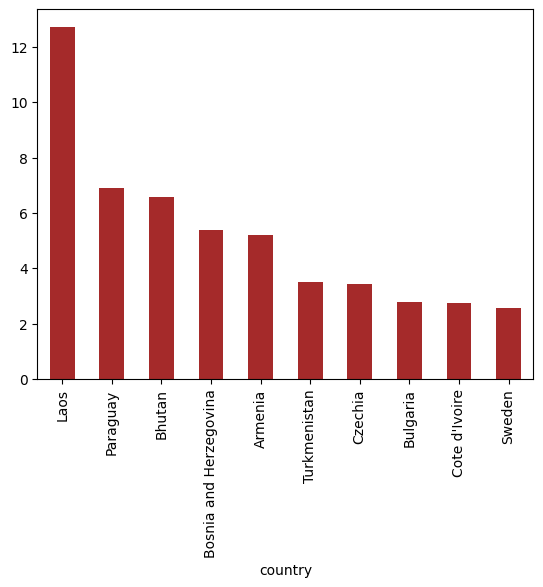

In [ ]:
# ratio: electricity demanded/generated
no_regions.loc[:, 'electricity_ratio'] = no_regions['electricity_demand'] / no_regions['electricity_generation']

# don't want nulls or infinity
elec_dropna = no_regions.dropna(subset=['electricity_ratio'])
elec_dropna = elec_dropna[elec_dropna['electricity_generation'] != 0]
elec_dropna = elec_dropna[(elec_dropna['year'] >= 2015) & (elec_dropna['year'] <= 2020)]
elec_series1 = elec_dropna.groupby('country')['electricity_ratio'].mean().sort_values(ascending=False).head(10)
elec_series2 = elec_dropna.groupby('country')['electricity_ratio'].mean().sort_values(ascending=True).head(10)

elec_series1.plot(kind='bar', color = 'brown')
elec_series2.plot(kind='bar', color = 'brown')


In [ ]:
#Compute Fossil vs. Renewable Energy Ratio

world_energy_df["fossil_energy"] = (world_energy_df["coal_consumption"] +
                                    world_energy_df["oil_consumption"] +
                                    world_energy_df["gas_consumption"])

world_energy_df["renewable_energy"] = (world_energy_df["solar_consumption"] +
                                       world_energy_df["wind_consumption"] +
                                       world_energy_df["hydro_consumption"] +
                                       world_energy_df["biofuel_consumption"])

world_energy_df["fossil_to_renewable_ratio"] = world_energy_df["fossil_energy"] / world_energy_df["renewable_energy"]

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samithsachidanandan/gdp-by-country-1960-2023")

print("Path to dataset files:", path)

100%|██████████| 80.1k/80.1k [00:00<00:00, 23.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/samithsachidanandan/gdp-by-country-1960-2023/versions/1


In [ ]:
! kaggle datasets download samithsachidanandan/gdp-by-country-1960-2023

Dataset URL: https://www.kaggle.com/datasets/samithsachidanandan/gdp-by-country-1960-2023
License(s): world-bank
  0% 0.00/80.1k [00:00<?, ?B/s]
100% 80.1k/80.1k [00:00<00:00, 62.3MB/s]


In [ ]:
! unzip "gdp-by-country-1960-2023.zip"

Archive:  gdp-by-country-1960-2023.zip
  inflating: All Countries and Economies GDP (US) 1960-2023.csv  


In [ ]:
zip_path = "gdp-by-country-1960-2023.zip"

In [ ]:
gdp_df = pd.read_csv('All Countries and Economies GDP (US) 1960-2023.csv')

In [ ]:
gdp_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.421063e+10,2.496398e+10,2.707880e+10,3.177575e+10,3.028579e+10,3.381317e+10,...,9.787080e+11,8.982780e+11,8.289430e+11,9.729990e+11,1.012310e+12,1.009720e+12,9.333920e+11,1.085750e+12,1.191420e+12,1.245470e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.723305e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.190495e+10,1.270788e+10,1.363076e+10,1.446909e+10,1.580376e+10,1.692109e+10,...,8.974160e+11,7.717670e+11,6.943610e+11,6.878490e+11,7.704950e+11,8.264840e+11,7.898020e+11,8.493120e+11,8.839740e+11,7.991060e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359670e+11,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.044000e+11,8.482465e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.074395e+09,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.413404e+09,9.354903e+09,1.046822e+10
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.052610e+11,3.893300e+11,3.379750e+11,4.208870e+11,4.069200e+11,3.806990e+11
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,6.987397e+08,6.823597e+08,6.792797e+08,7.043397e+08,8.226397e+08,1.061200e+09,...,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.813776e+10,2.209642e+10,2.916378e+10,2.757796e+10


In [ ]:
gdp_df_clean = gdp_df.drop('Indicator Code', axis=1)
gdp_df_clean = gdp_df_clean.drop('Indicator Name', axis=1)
gdp_df_clean

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09
1,Africa Eastern and Southern,AFE,2.421063e+10,2.496398e+10,2.707880e+10,3.177575e+10,3.028579e+10,3.381317e+10,3.693497e+10,3.845217e+10,...,9.787080e+11,8.982780e+11,8.289430e+11,9.729990e+11,1.012310e+12,1.009720e+12,9.333920e+11,1.085750e+12,1.191420e+12,1.245470e+12
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.723305e+10
3,Africa Western and Central,AFW,1.190495e+10,1.270788e+10,1.363076e+10,1.446909e+10,1.580376e+10,1.692109e+10,1.803417e+10,1.649375e+10,...,8.974160e+11,7.717670e+11,6.943610e+11,6.878490e+11,7.704950e+11,8.264840e+11,7.898020e+11,8.493120e+11,8.839740e+11,7.991060e+11
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.359670e+11,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.044000e+11,8.482465e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.074395e+09,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.413404e+09,9.354903e+09,1.046822e+10
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,...,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.052610e+11,3.893300e+11,3.379750e+11,4.208870e+11,4.069200e+11,3.806990e+11
264,Zambia,ZMB,6.987397e+08,6.823597e+08,6.792797e+08,7.043397e+08,8.226397e+08,1.061200e+09,1.239000e+09,1.340639e+09,...,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.813776e+10,2.209642e+10,2.916378e+10,2.757796e+10


In [ ]:
# gdp tidy data
non_year_cols = ['Country Name', 'Country Code']
gdp_melted = gdp_df_clean.melt(id_vars=non_year_cols, var_name='year', value_name='gdp')
gdp_melted['year'] = gdp_melted['year'].astype(int)

In [ ]:
# merge
world_energy_pop_df = no_regions.merge(gdp_melted,
                                  left_on=["iso_code", "year"],
                                  right_on=["Country Code", "year"],
                                  how="left")

In [ ]:
world_energy_df[['country', 'year', 'gdp']]

,country,year,gdp
0,Afghanistan,1900,NaN
1,Afghanistan,1901,NaN
2,Afghanistan,1902,NaN
3,Afghanistan,1903,NaN
4,Afghanistan,1904,NaN
...,...,...,...
17234,Zimbabwe,2016,2.096179e+10
17235,Zimbabwe,2017,2.194784e+10
17236,Zimbabwe,2018,2.271535e+10
17237,Zimbabwe,2019,NaN
